In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import py3Dmol
import glob
sns.set_style('darkgrid')
# %cd /net/pulsar/home/koes/jok120/openfold
%matplotlib inline
# increase the default matplotlib plot size
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [40]:
# Path to reminimization output files:
outfiles_dir = "/net/pulsar/home/koes/jok120/repos/sidechainnet/sidechainnet/research/cluster/230307"
summary_file = "rmsd_ca_230312.csv"
!echo "There are" $(ls -1 /net/pulsar/home/koes/jok120/scnmin230306/min/*.pkl | wc -l) "minimized proteins."
!echo "There are" $(ls -1 /net/pulsar/home/koes/jok120/scnmin230306/failed/* | wc -l) "failed proteins."
!echo ""
!echo "protein_name,key,rmsd_ca,duration" > $summary_file
!grep -hr RMSD_CA $outfiles_dir/ >> $summary_file
!head $summary_file

There are 13563 minimized proteins.
There are 9036 failed proteins.

protein_name,key,rmsd_ca,duration
10#1WAZ_1_A,RMSD_CA,0.6363205653541116,70.53507566452026
10#2EEM_1_A,RMSD_CA,0.894565342666127,34.606359243392944
10#1Z9V_1_A,RMSD_CA,1.3383635627739667,495.4431824684143
10#2MNJ_1_A,RMSD_CA,0.3524257842023318,30.19338035583496
10#2MHD_1_A,RMSD_CA,0.7372067886286301,338.36463379859924
10#3NO7_1_A,RMSD_CA,1.0952503899559236,81.9446210861206
10#2KW1_1_A,RMSD_CA,0.23231365171597973,120.85253190994263
10#2FK5_1_A,RMSD_CA,0.8527862884885931,1856.631195783615
10#2MFQ_2_B,RMSD_CA,1.1669570876262094,219.61714386940002


In [11]:
df = pd.read_csv(summary_file)
df.sort_values(by='rmsd_ca', ascending=False).head()

,protein_name,key,rmsd_ca,duration
3481,1FN4_2_B,RMSD_CA,28.722997,8704.552544
2631,1EA0_d1ea0b1,RMSD_CA,23.218166,1884.682705
4161,1GO4_2_E,RMSD_CA,22.264465,91.311738
6339,1K28_d1k28a2,RMSD_CA,21.884461,2063.670427
6252,1JVR_1_A,RMSD_CA,21.310825,1464.908934


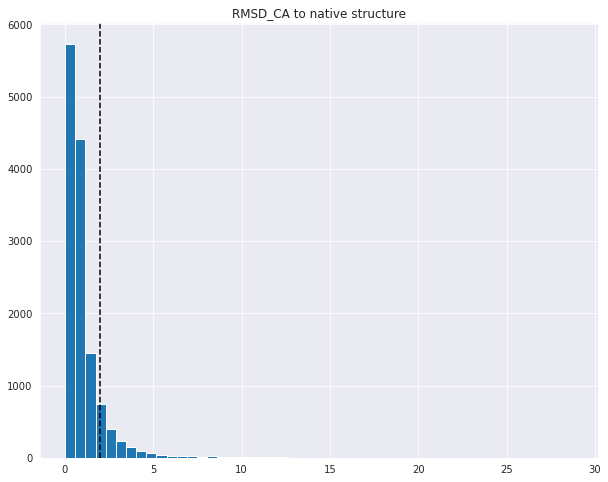

Fraction of structures with RMSD_CA < 2: 0.8883799955677033
Fraction of structures with RMSD_CA < 1: 0.6976434956046391

Number of structures with RMSD_CA < 2: 12026
Number of structures with RMSD_CA > 2: 1511
Number of structures with RMSD_CA > 2: 258


In [42]:
df.hist(column="rmsd_ca", bins=50)
plt.title("RMSD_CA to native structure")
plt.axvline(2, color="k", linestyle="dashed");
plt.show()

print("Fraction of structures with RMSD_CA < 2:", len(df[df['rmsd_ca'] < 2]) / len(df))
print("Fraction of structures with RMSD_CA < 1:", len(df[df['rmsd_ca'] < 1]) / len(df))
print("")
print("Number of structures with RMSD_CA < 2:", len(df[df['rmsd_ca'] < 2]))
print("Number of structures with RMSD_CA > 2:", len(df[df['rmsd_ca'] > 2]))
print("Number of structures with RMSD_CA > 2:", len(df[df['rmsd_ca'] > 5]))

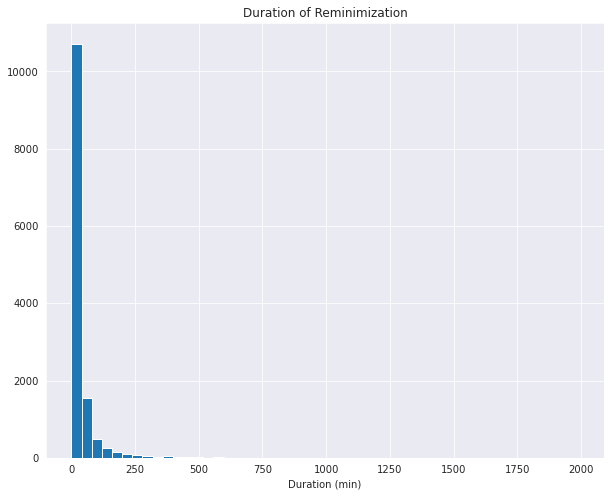

count    13537.000000
mean        34.776601
std         81.841205
min          0.107543
25%          4.655297
50%         11.091183
75%         32.760049
max       1991.336118
Name: duration, dtype: float64


In [41]:
(df['duration'] / 60).hist(bins=50)
plt.xlabel("Duration (min)");
plt.title("Duration of Reminimization");
plt.show()
print((df['duration'] / 60).describe())